NoteBook for Predicting a Biological Response

In this notebook we are using the data from an old Kaggle competition : Predicting a Biological Response: https://www.kaggle.com/c/bioresponse/ 

Importing data analysis and modelling libraries

In [1]:
# data analysis libraries:
import numpy as np
import pandas as pd
# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# to display all columns:
pd.set_option('display.max_columns', None)

# to ignore warnings:
import sys
if not sys.warnoptions:
    import os, warnings
    warnings.simplefilter("ignore") 
    os.environ["PYTHONWARNINGS"] = "ignore" 

In [2]:
#timer
import time
from contextlib import contextmanager

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} done in {:.0f}s".format(title, time.time() - t0))

In [3]:
# Importing modelling libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

Loading the data

In [4]:
all_data = pd.read_csv(r'train.csv')

In [5]:
all_data.shape

(3751, 1777)

In [6]:
all_data.sample(5)

Activity        D1        D2    D3    D4        D5        D6        D7  \
460          1  0.100000  0.679774  0.15  0.00  0.243269  0.594299  0.186304   
1772         0  0.533333  0.557004  0.00  0.00  0.048700  0.886646  0.092400   
3541         0  0.100000  0.728301  0.10  0.25  0.185797  0.715362  0.254123   
3450         0  0.066700  0.489096  0.00  0.00  0.246670  0.725281  0.237810   
3339         1  0.233333  0.576096  0.00  0.00  0.109975  0.746796  0.278429   

            D8        D9       D10       D11     D12       D13       D14  \
460   0.531051  0.623036  0.358188  0.106452  0.0625  0.000000  0.119845   
1772  0.373116  0.959950  0.017200  0.139609  0.1250  0.677419  0.126556   
3541  0.452489  0.770159  0.222831  0.370266  0.1875  0.000000  0.152106   
3450  0.356379  0.800212  0.174459  0.283871  0.0625  0.032300  0.072000   
3339  0.591066  0.802012  0.272733  0.000000  0.1875  0.000000  0.153808   

           D15       D16       D17       D18       D19       D20      D21  \
460   0.317413  0.304546  0.444434  0.188642  0.061800  0.035600  0.00431   
1772  0.515106  0.123364  0.933541  0.164222  0.582323  0.184877  0.04020   
3541  0.518703  0.338889  0.607128  0.220067  0.233212  0.126604  0.02370   
3450  0.547982  0.207825  0.613925  0.178856  0.135013  0.086300  0.01090   
3339  0.535881  0.300804  0.663619  0.291471  0.165961  0.045800  0.00746   

           D22  D23   D24       D25       D26  D27  D28       D29       D30  \
460   0.103448    1  0.00  0.377342  0.887016    1    1  0.000000  0.256614   
1772  0.344828    0  0.75  0.353635  0.711696    0    0  0.833333  0.057400   
3541  0.000000    1  0.00  0.548415  0.664606    1    1  0.000000  0.179437   
3450  0.034500    1  0.00  0.527961  0.738690    0    1  0.000000  0.287351   
3339  0.103448    1  0.00  0.467795  0.757066    1    1  0.166667  0.151399   

           D31       D32       D33       D34       D35       D36  D37  \
460   0.090500  0.041400  0.100295  0.040000  0.000000  0.146735  0.0   
1772  0.313526  0.301606  0.313919  0.155349  0.588235  0.166667  0.0   
3541  0.294460  0.057600  0.050500  0.000000  0.147564  0.000000  0.0   
3450  0.140546  0.041400  0.000000  0.000000  0.058800  0.166667  0.0   
3339  0.074500  0.154812  0.000000  0.130315  0.176471  0.000000  0.0   

           D38       D39       D40  D41     D42       D43       D44       D45  \
460   0.056200  0.000000  0.000000  0.0  0.0765  0.113587  0.000000  0.310603   
1772  0.207604  0.209817  0.000000  0.0  0.0000  0.078900  0.623892  0.311940   
3541  0.096100  0.075100  0.222222  0.0  0.0419  0.133279  0.000000  0.176369   
3450  0.073000  0.265005  0.000000  0.0  0.0000  0.066600  0.053700  0.195428   
3339  0.112366  0.000000  0.000000  0.0  0.0000  0.133279  0.195827  0.336582   

           D46       D47       D48       D49       D50  D51       D52  \
460   0.612119  0.102322  0.126562  0.049100  1.000000    0  1.000000   
1772  0.630859  0.467893  0.401293  0.447184  1.000000    0  0.581818   
3541  0.524192  0.279334  0.123926  0.098200  0.857143    1  1.000000   
3450  0.411128  0.246380  0.080600  0.094900  0.800000    0  1.000000   
3339  0.593127  0.184215  0.209376  0.117426  0.833333    0  0.040000   

           D53     D54       D55      D56       D57     D58       D59  \
460   0.093600  0.0819  0.000000  0.00000  0.149106  0.0000  0.000000   
1772  0.468858  0.0288  0.516695  0.12500  0.048600  0.0113  0.000000   
3541  0.002800  0.0433  0.127724  0.11459  0.017600  0.0594  0.000000   
3450  0.000000  0.0288  0.063900  0.07580  0.059400  0.0667  0.157501   
3339  0.160974  0.0423  0.052300  0.00000  0.350894  0.0000  0.157501   

           D60       D61       D62       D63      D64       D65       D66  \
460   0.000000  0.000000  0.071800  0.037900  0.05850  0.017300  0.161136   
1772  0.264706  0.281002  0.270497  0.573614  0.02890  0.577086  0.000000   
3541  0.117647  0.240486  0.143658  0.037900  0.00497  0.017300  0.013600   
3450  0.000000  0.

In [7]:
target = all_data.pop("Activity")

In [8]:
all_data.columns

Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1776)

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1776 entries, D1 to D1776
dtypes: float64(942), int64(834)
memory usage: 50.8 MB


Dealing with missing values

In [10]:
def missing_values(data):
    co = 0
    for col in data.columns.tolist():          
        if data[col].isnull().any():
            co += 1
            print('"{}" column missing values: {}'.format(col, data[col].isnull().sum()))
    print("Found a total of {} missing values".format(co))
print('missing values:')
missing_values(all_data)

missing values:
Found a total of 0 missing values


Checking for the values range for the features 

In [11]:
print("Max value in data: {}".format(all_data.max().max()))
print("Min value in data: {}".format(all_data.min().min()))

Max value in data: 1.0
Min value in data: 0.0


More details about every column:

In [12]:
all_data.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.99])

D1           D2           D3           D4           D5  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.076948     0.592436     0.068142     0.038990     0.212112   
std       0.079989     0.105860     0.078414     0.115885     0.102592   
min       0.000000     0.282128     0.000000     0.000000     0.002630   
1%        0.000000     0.372990     0.000000     0.000000     0.048400   
10%       0.000000     0.452026     0.000000     0.000000     0.110869   
25%       0.033300     0.517811     0.000000     0.000000     0.138118   
50%       0.066700     0.585989     0.050000     0.000000     0.190926   
75%       0.100000     0.668395     0.100000     0.000000     0.261726   
99%       0.400000     0.834977     0.300000     0.500000     0.544534   
max       1.000000     0.964381     0.950000     1.000000     1.000000   

                D6           D7           D8           D9          D10  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.686653     0.274713     0.455133     0.749517     0.270411   
std       0.078702     0.090017     0.162731     0.071702     0.096128   
min       0.137873     0.006130     0.000000     0.275590     0.003040   
1%        0.536672     0.099100     0.067800     0.564656     0.037900   
10%       0.597933     0.156401     0.191186     0.679051     0.140191   
25%       0.625627     0.207374     0.378062     0.707339     0.194357   
50%       0.674037     0.277845     0.499942     0.738961     0.284316   
75%       0.740663     0.335816     0.569962     0.788177     0.344626   
99%       0.885711     0.451992     0.761245     0.948113     0.459878   
max       0.994735     0.790831     0.989870     1.000000     1.000000   

               D11          D12          D13          D14          D15  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.171688     0.079529     0.017066     0.126521     0.516515   
std       0.177193     0.086347     0.058205     0.066008     0.088258   
min       0.000000     0.000000     0.000000     0.000000     0.002970   
1%        0.000000     0.000000     0.000000     0.035250     0.345593   
10%       0.000000     0.000000     0.000000     0.068400     0.361918   
25%       0.040900     0.000000     0.000000     0.086700     0.490939   
50%       0.127742     0.062500     0.000000     0.111940     0.538590   
75%       0.236559     0.125000     0.000000     0.146727     0.574141   
99%       0.798387     0.375000     0.258065     0.386662     0.682560   
max       1.000000     1.000000     1.000000     1.000000     0.725665   

               D16          D17          D18          D19          D20  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.278736     0.580890     0.196150     0.140164     0.082016   
std       0.116261     0.107543     0.087323     0.084340     0.078940   
min       0.000000     0.155826     0.000000     0.001700     0.000000   
1%        0.092800     0.301683     0.000000     0.030800     0.000000   
10%       0.118779     0.444421     0.076300     0.063400     0.028700   
25%       0.214897     0.517569     0.167060     0.089100     0.037800   
50%       0.286008     0.583759     0.192559     0.122522     0.057300   
75%       0.316348     0.655975     0.233165     0.164934     0.096350   
99%       0.680393     0.861822     0.456856     0.457315     0.433183   
max       0.980615     1.000000     1.000000     0.964094     0.895526   

               D21          D22          D23          D24          D25  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.012049     0.045368     0.966409     0.051853     0.493408   
std       0.015626     0.060156     0.180198     0.137879     0.075702   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
1%        0.002110     0.000000     0.000000     0.000000     0.315008   
10%       0.0039

We can notice that the data is already normalized and all features are on the same scale: (0,1). 

Checking the distribution of the labels:

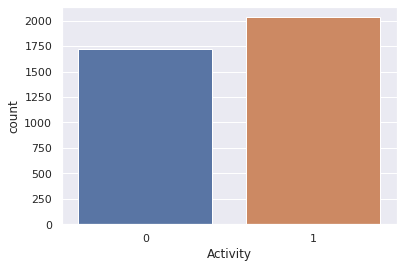

In [13]:
p = sns.countplot(x=target)

plt.show()

We can see that the two labels have a fair proportion in the data, thus we don't need any sampling methods.

Before proceeding to any feature selection/training on our data, we need to split the data into train-set/test-set and keep the test set aside until reaching the testing phase for our model.  

In [16]:
x_train, x_test, y_train, y_test = train_test_split(all_data,target,test_size=0.2,random_state=32)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3000, 1776), (3000,), (751, 1776), (751,))

Change the range of values from (0,1) to (-1,1):

In [17]:
columns  = x_train.columns

# Normalizing Column values
MinMax = MinMaxScaler(feature_range=(-1,1))
X_train_arr = MinMax.fit_transform(x_train)
X_test_arr = MinMax.transform(x_test)

x_train = pd.DataFrame(X_train_arr, columns=x_train.columns)
x_test = pd.DataFrame(X_test_arr, columns=x_test.columns)

We can proceed now to the training of our model, we will start first with the training and the cross validation of multiple default models, then we will pick one or two models for the fine tuning of its parameters 

Train Set Accuracy for the default models

In [18]:
r=1000
models = [LogisticRegression(random_state=r, max_iter=3000),GaussianNB(), KNeighborsClassifier(),
          SVC(random_state=r,probability=True),DecisionTreeClassifier(random_state=r),
          RandomForestClassifier(random_state=r), GradientBoostingClassifier(random_state=r)]
names = ["LogisticRegression","GaussianNB","KNN","SVC",
             "DecisionTree","Random_Forest","GBM"]

In [19]:
print('Default model train accuracies for the train data:', end = "\n")
print('_____________________________________________________________________________________________________')
for name, model in zip(names, models):
    with timer(">Model Training"):
        model.fit(x_train, y_train)
        print(name, ': Train set accuracy :', "%.3f" % round(model.score(x_train, y_train)*100, 2))
    print('_____________________________________________________________________________________________________')

Default model train accuracies for the train data:
_____________________________________________________________________________________________________
LogisticRegression : Train set accuracy : 91.100
>Model Training done in 8s
_____________________________________________________________________________________________________
GaussianNB : Train set accuracy : 62.500
>Model Training done in 0s
_____________________________________________________________________________________________________
KNN : Train set accuracy : 82.900
>Model Training done in 1s
_____________________________________________________________________________________________________
SVC : Train set accuracy : 85.100
>Model Training done in 57s
_____________________________________________________________________________________________________
DecisionTree : Train set accuracy : 100.000
>Model Training done in 1s
_____________________________________________________________________________________________________

In [ ]:
results = []
print('10 fold Cross validation accuracy and std of the default models for the train data:', end = "\n\n")
for name, model in zip(names, models):
    with timer(">Model Tuning with default params"):
        kfold = KFold(n_splits=10, random_state=1001, shuffle=True)
        cv_results = cross_val_score(model, x_train, y_train, cv = kfold)
        results.append(cv_results)
        print("{}: {} ({})".format(name, "%.3f" % cv_results.mean() ,"%.3f" %  cv_results.std()))
    print('_____________________________________________________________________________________________________')

10 fold Cross validation accuracy and std of the default models for the train data:

LogisticRegression: 0.742 (0.020)
>Model Tuning with default params done in 73s
_____________________________________________________________________________________________________
GaussianNB: 0.599 (0.024)
>Model Tuning with default params done in 1s
_____________________________________________________________________________________________________
KNN: 0.742 (0.036)
>Model Tuning with default params done in 2s
_____________________________________________________________________________________________________
SVC: 0.781 (0.021)
>Model Tuning with default params done in 418s
_____________________________________________________________________________________________________
DecisionTree: 0.726 (0.024)
>Model Tuning with default params done in 10s
_____________________________________________________________________________________________________
Random_Forest: 0.784 (0.028)
>Model Tuning with de

Fine Tuning the GBM and the Random_Forest models

In [ ]:
#possible parameters
rf_params = {"max_features": ["log2","auto","sqrt"],
                "min_samples_split":[2,3,5],
                "min_samples_leaf":[1,3,5],
                "bootstrap":[True,False],
                "n_estimators":[50,100,150],
                "criterion":["gini","entropy"]}
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}
classifier_params = [rf_params, gbm_params]
models = [RandomForestClassifier(random_state=r), GradientBoostingClassifier(random_state=r)]
names = ["Random_Forest", "GBM"]

In [ ]:
# Tuning by Cross Validation  
cv_result = {}
best_estimators = {}
for name, model,classifier_param in zip(names, models,classifier_params):
    with timer(">Model tuning"):
        clf = GridSearchCV(model, param_grid=classifier_param, cv =5, scoring = "accuracy", n_jobs = -1,verbose = False)
        clf.fit(x_train,y_train)
        cv_result[name]=clf.best_score_
        best_estimators[name]=clf.best_estimator_
        print(name,'cross validation accuracy : %.3f'%cv_result[name])

Random_Forest cross validation accuracy : 0.794
>Model tuning done in 1557s
GBM cross validation accuracy : 0.800
>Model tuning done in 19248s


In [ ]:
best_estimators

{'Random_Forest': RandomForestClassifier(min_samples_split=3, n_estimators=150, random_state=1000),
 'GBM': GradientBoostingClassifier(learning_rate=0.05, max_depth=5, random_state=1000)}

In [ ]:
cv_result

{'Random_Forest': 0.7943333333333333, 'GBM': 0.8}

In [27]:
accuracies={}
predictions = []
print('Validation accuracies of the tuned models for the test data:', end = "\n\n")
for name, model_tuned in zip(best_estimators.keys(),best_estimators.values()):
    y_pred =  model_tuned.fit(x_train,y_train).predict(x_test)
    predictions.append(y_pred)
    accuracy=accuracy_score(y_pred, y_test)
    print(name,':', "%.3f" %accuracy)
    accuracies[name]=accuracy

Validation accuracies of the tuned models for the test data:

Random_Forest : 0.811
GBM : 0.784


Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
for name,pred in zip(best_estimators.keys(),predictions):
  cm = confusion_matrix(pred,y_test)
  print("Confusion Matrix of the ", name, " Model: ")
  print(cm)

Confusion Matrix of the  Random_Forest  Model: 
[[263  74]
 [ 68 346]]
Confusion Matrix of the  GBM  Model: 
[[241  72]
 [ 90 348]]


Classification Report

In [29]:
from sklearn.metrics import classification_report
for name,pred in zip(best_estimators.keys(),predictions):
  report = classification_report(y_test, pred)
  print("Classification Report of the ", name, " Model: ")
  print(report)

Classification Report of the  Random_Forest  Model: 
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       331
           1       0.84      0.82      0.83       420

    accuracy                           0.81       751
   macro avg       0.81      0.81      0.81       751
weighted avg       0.81      0.81      0.81       751

Classification Report of the  GBM  Model: 
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       331
           1       0.79      0.83      0.81       420

    accuracy                           0.78       751
   macro avg       0.78      0.78      0.78       751
weighted avg       0.78      0.78      0.78       751

